In [1]:
%pip install matplotlib simple_pid control

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import control as ctrl
import math
from boat_simulator.nodes.low_level_control.control import VanilaPID

In [34]:
class RobotPID(VanilaPID):
    """Individual Class for the Model Robot Arm PID controller.

    Extends: VanilaPID
    """

    def _compute_error(self, current, target):
        return target - current

In [44]:
"""Robot Arm Test implementation for PID Controller"""

from abc import ABC, abstractmethod
from math import exp
from typing import Any, List


from boat_simulator.common.types import Scalar
from boat_simulator.common.utils import bound_to_180

GRAVITY = 9.8


class Plant:
    # Private class member defaults

    __target_position: Scalar = 0.0
    __current_position: Scalar = 0.0
    __time_period: Scalar = 0.0
    __position_log: List[Scalar] = list()
    __time_log: List[Scalar] = list()

    def __init__(
        self,
        target_position: Scalar,
        current_position: Scalar,
        time_period: Scalar,
    ):
        self.__target_position = target_position
        self.__current_position = current_position
        self.__time_period = time_period
        self.__position_log = []
        self.__time_log = []

    def run(
        self,
        count: int,
        controller: RobotPID,
    ) -> Scalar:
        running_time = 0
        self.__position_log.append(0)
        self.__time_log.append(0)
        prev_position = self.__current_position
        for _ in range(count):
            feedback = controller.step(prev_position, self.__target_position)

            position = math.exp(-feedback) * feedback

            self.__position_log.append(position)
            self.__time_log.append(running_time)

            prev_position = position
            running_time += self.__time_period
        return self.__time_log, self.__position_log

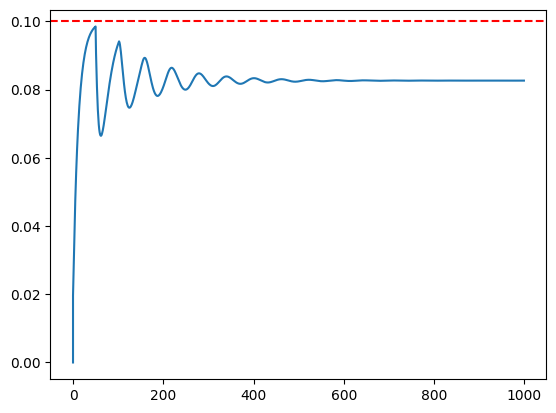

In [91]:
from matplotlib import pyplot as plt

dt = 1

pid = RobotPID(kp=0.1, ki=0.1, kd=0.01, time_period=dt, buf_size=50, sum_threshold=100)
robot = Plant(target_position=0.1, current_position=0, time_period=dt)
x, y = robot.run(controller=pid, count=1000)

plt.plot(x, y)
plt.axhline(y=0.1, color="r", linestyle="--")
# plt.plot(x, robot.forces)

# function to show the plot
plt.show()

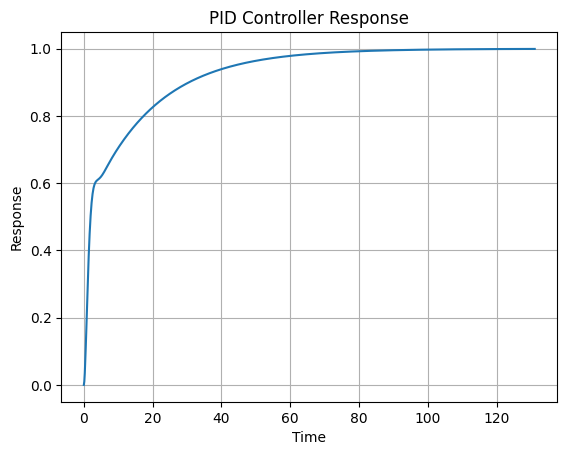

In [2]:
# Define the system
system = ctrl.TransferFunction([1], [1, 2, 1])

# Define PID controller parameters
kp = 1.0
ki = 0.1
kd = 0.01

# Create a PID controller
pid_controller = ctrl.TransferFunction([kd, kp, ki], [1, 0])

# Connect the PID controller to the system
closed_loop_system = ctrl.feedback(system * pid_controller)

# Time vector
time, response = ctrl.step_response(closed_loop_system)

# Plot the response


plt.plot(time, response)
plt.xlabel("Time")
plt.ylabel("Response")
plt.title("PID Controller Response")
plt.grid(True)
plt.show()